# Cointegration testing for ln(bitcoin price) vs ln(Stock-to-flow)

## Setting up the data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib import pyplot as plt

%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm


The dataset can be found here: https://medium.com/burgercrypto-com/building-a-bitcoin-dataset-b2f526d667ce

In [3]:
bitcoindata= pd.read_csv("bitcoindataset.csv")

In [4]:
bitcoindata.head()

,timestamp,blockheight,close,difficulty,supply,lnprice,Ret,Log_Ret,Volatility,S2F,blocks_to_halving,blocks_to_nearest_halving
0,2010-10-13,84963.0,0.105,1378.028165,4248150.0,-2.253795,NaN,NaN,NaN,NaN,125037.0,84963.0
1,2010-10-14,85168.0,0.102,1378.028165,4258400.0,-2.282782,-0.028571,-0.028988,NaN,1.135489,124832.0,85168.0
2,2010-10-15,85345.0,0.105,1378.028165,4267250.0,-2.253795,0.029412,0.028988,NaN,1.318288,124655.0,85345.0
3,2010-10-16,85603.0,0.101,1378.028165,4280150.0,-2.292635,-0.038095,-0.038840,NaN,0.906287,124397.0,85603.0
4,2010-10-17,85873.0,0.102,1378.028165,4293650.0,-2.282782,0.009901,0.009852,NaN,0.868625,124127.0,85873.0


In [5]:
bitcoindata.bfill(inplace=True)
bitcoindata.ffill(inplace=True)
bitcoindata['LNS2F']=np.log(bitcoindata['S2F'])

In [6]:
bitcoindata.head()

,timestamp,blockheight,close,difficulty,supply,lnprice,Ret,Log_Ret,Volatility,S2F,blocks_to_halving,blocks_to_nearest_halving,LNS2F
0,2010-10-13,84963.0,0.105,1378.028165,4248150.0,-2.253795,-0.028571,-0.028988,2.549128,1.135489,125037.0,84963.0,0.127064
1,2010-10-14,85168.0,0.102,1378.028165,4258400.0,-2.282782,-0.028571,-0.028988,2.549128,1.135489,124832.0,85168.0,0.127064
2,2010-10-15,85345.0,0.105,1378.028165,4267250.0,-2.253795,0.029412,0.028988,2.549128,1.318288,124655.0,85345.0,0.276334
3,2010-10-16,85603.0,0.101,1378.028165,4280150.0,-2.292635,-0.038095,-0.038840,2.549128,0.906287,124397.0,85603.0,-0.098400
4,2010-10-17,85873.0,0.102,1378.028165,4293650.0,-2.282782,0.009901,0.009852,2.549128,0.868625,124127.0,85873.0,-0.140844


## Start by looking at visual representation of the data

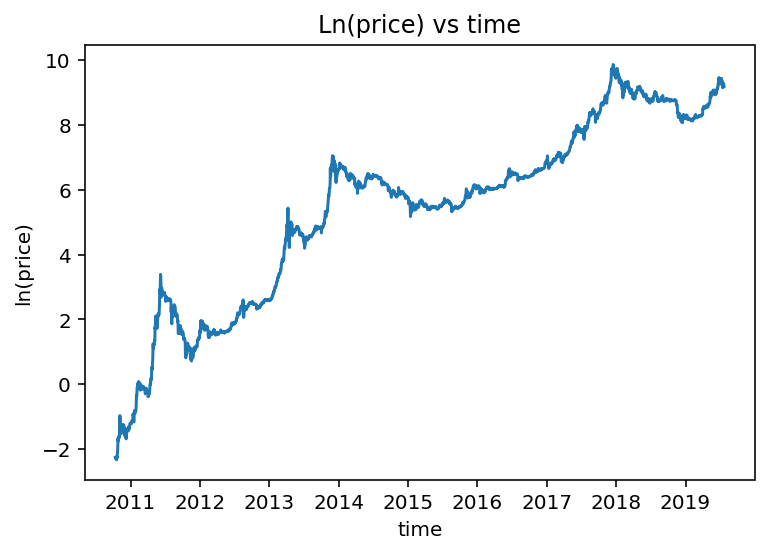

In [7]:
from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

set_matplotlib_formats('retina')
y= bitcoindata['lnprice']
x= pd.to_datetime(bitcoindata['timestamp'])
plt.title('Ln(price) vs time');
plt.ylabel('ln(price)');
plt.xlabel('time');
plt.plot(x,y);
plt.show();

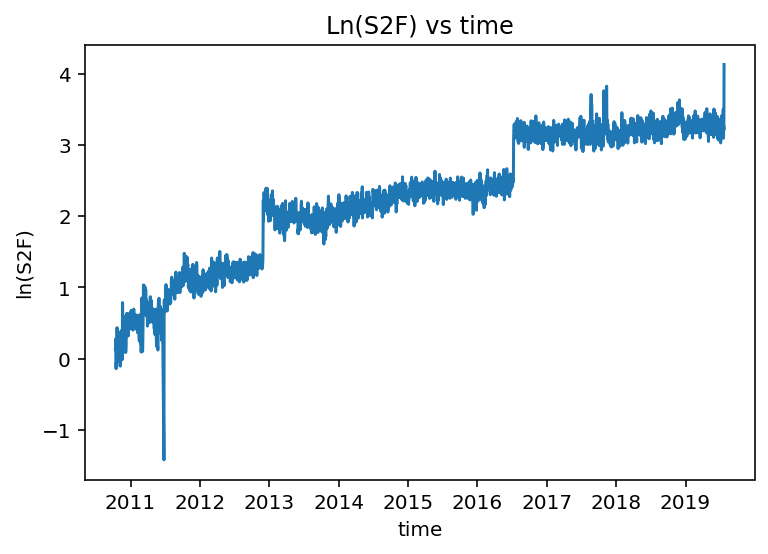

In [8]:
y= bitcoindata['LNS2F']
x= pd.to_datetime(bitcoindata['timestamp'])
plt.plot(x,y);
plt.title('Ln(S2F) vs time');
plt.ylabel('ln(S2F)');
plt.xlabel('time');
plt.show();

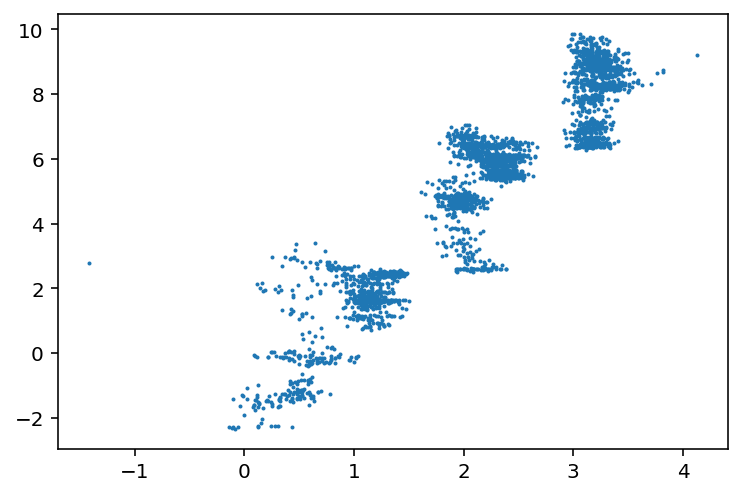

In [9]:
y=bitcoindata['lnprice']
x=bitcoindata['LNS2F']
plt.scatter(x,y,s=1);
plt.show();

## Checking integration order of the timeseries

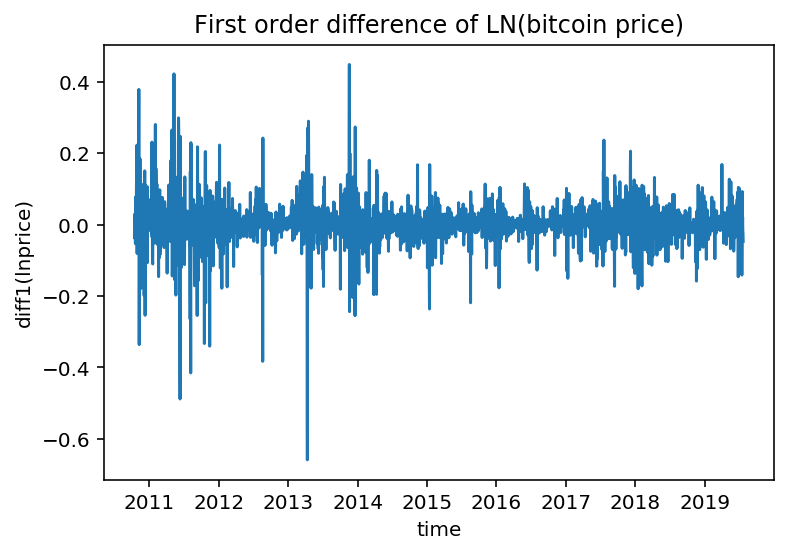

In [10]:
diff1lnprice = bitcoindata['lnprice'].diff()
y= diff1lnprice
x= pd.to_datetime(bitcoindata['timestamp'])
plt.plot(x,y)
plt.title('First order difference of LN(bitcoin price)');
plt.ylabel('diff1(lnprice)');
plt.xlabel('time');
plt.show();


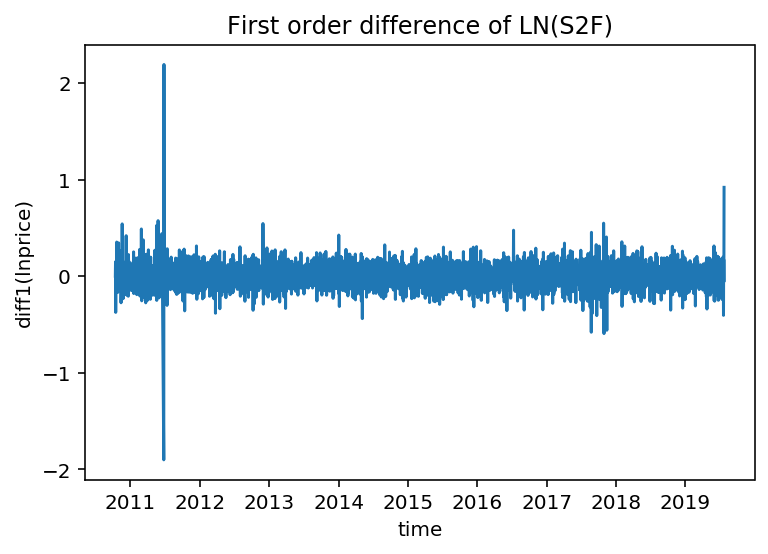

In [11]:
diff1lnS2F = bitcoindata['LNS2F'].diff()
y= diff1lnS2F
x= pd.to_datetime(bitcoindata['timestamp'])
plt.title('First order difference of LN(S2F)');
plt.ylabel('diff1(lnprice)');
plt.xlabel('time');

plt.plot(x,y);
plt.show();

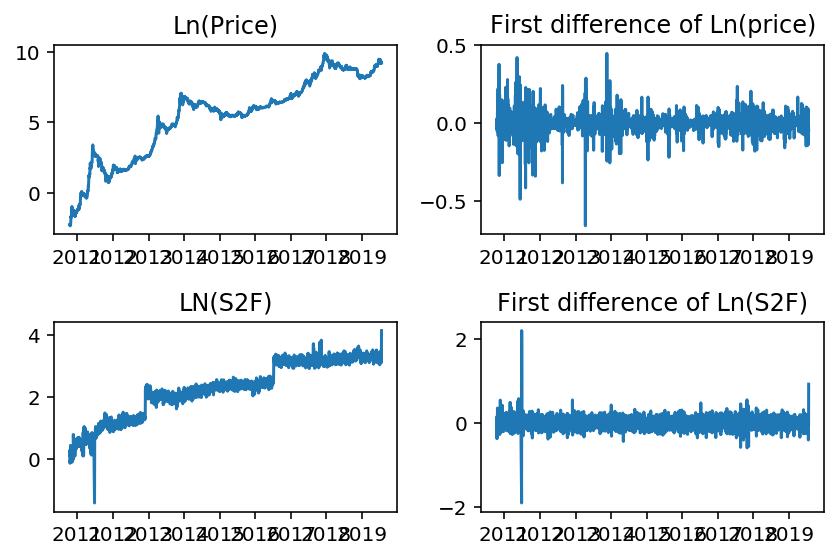

In [12]:
fig, axs = plt.subplots(2,2);
axs[0, 0].plot(pd.to_datetime(bitcoindata['timestamp']), bitcoindata['lnprice'])
axs[0, 0].set_title('Ln(Price)');
axs[0, 1].plot(pd.to_datetime(bitcoindata['timestamp']), diff1lnprice);
axs[0, 1].set_title('First difference of Ln(price)');
axs[1, 0].plot(pd.to_datetime(bitcoindata['timestamp']), bitcoindata['LNS2F']);
axs[1, 0].set_title('LN(S2F)');
axs[1, 1].plot(pd.to_datetime(bitcoindata['timestamp']), diff1lnS2F);
axs[1, 1].set_title('First difference of Ln(S2F)');
fig.tight_layout();
               

## Testing differenced timeseries for stationarity

In [13]:
from statsmodels.tsa.stattools import adfuller
#First value is NaN so we have to skip it in the test
result = adfuller(diff1lnprice.iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.843153
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [14]:
result = adfuller(diff1lnS2F.iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.426991
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


## Running OLS regression to estimate coefficients

In [15]:
X=sm.add_constant(bitcoindata['LNS2F']);
m=sm.OLS(bitcoindata['lnprice'],X);

/home/username/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
results = m.fit()

In [17]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                 2.229e+04
Date:                Sun, 17 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:58:40   Log-Likelihood:                -4543.8
No. Observations:                3200   AIC:                             9092.
Df Residuals:                    3198   BIC:                             9104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2696      0.048    -26.463      0.000      -1.364      -1.176
LNS2F          2.9650      0.020    149.285      0.000       2.926       3.004
==============================================================================
Omnibus:                      116.008   Durbin-Watson:                   0.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.481
Skew:                           0.120   Prob(JB):                     6.27e-68
Kurtosis:                       4.505   Cond. No.                         7.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

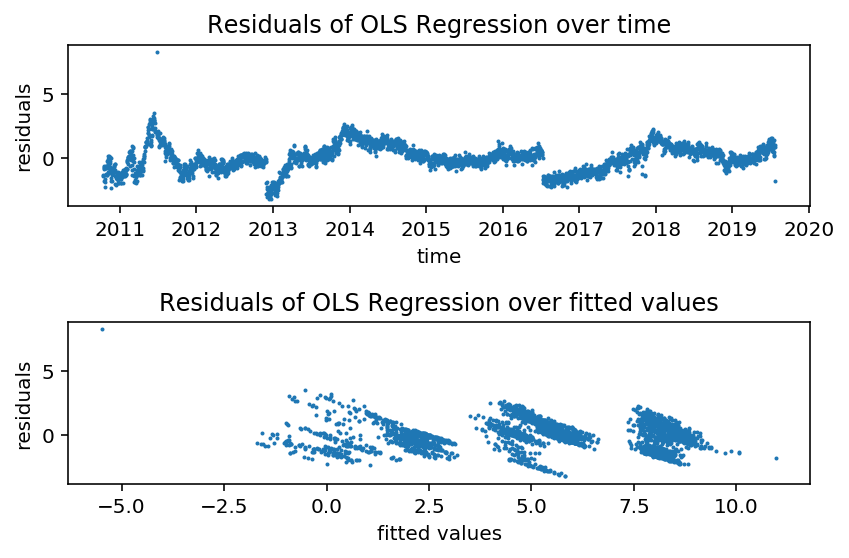

In [18]:
fig, axs = plt.subplots(2,1);

y=results.resid
x= pd.to_datetime(bitcoindata['timestamp'])
axs[0].scatter(x,y,s=1)
axs[0].set_title('Residuals of OLS Regression over time');
axs[0].set_ylabel('residuals');
axs[0].set_xlabel('time');
y=results.resid
x= results.fittedvalues
axs[1].scatter(x,y,s=1)
axs[1].set_title('Residuals of OLS Regression over fitted values');
axs[1].set_ylabel('residuals');
axs[1].set_xlabel('fitted values');
fig.tight_layout();




### Running a separate Durbin-Watson test on the residuals 

In [19]:
sm.stats.stattools.durbin_watson(results.resid,axis=0)

0.1606690313320628

## Check for unit root in the residuals; i.e. are the residuals showing stationarity or not.
If the residuals are non-stationary, the regression is spurious and cointegration doesn't apply.

In [20]:
result = adfuller(results.resid)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.714701
p-value: 0.003911
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [21]:
data = pd.DataFrame()
data['x']=bitcoindata['LNS2F']
data['y']=bitcoindata['lnprice']

## Running Johansen Test to check for cointegration
If the test statistics turn out to be smaller than the critical values, we have to reject the null hypothesis of no cointegration.

In [22]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
cointtest=coint_johansen(data,0,1)

print('Trace Statistic:') 
print(cointtest.lr1) 
print('Critical Values Trace Statistic [90% 95% 99%]:')
print(cointtest.cvt)
print('Maximum Eigenvalue Statistic') 
print(cointtest.lr2)
print('Critical Values Maximum Eigenvalue Statistic [90% 95% 99%]')
print(cointtest.cvm)


Trace Statistic:
[77.61330689  8.83704667]
Critical Values Trace Statistic [90% 95% 99%]:
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Maximum Eigenvalue Statistic
[68.77626022  8.83704667]
Critical Values Maximum Eigenvalue Statistic [90% 95% 99%]
[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


## The resulting modelled values vs actual values.

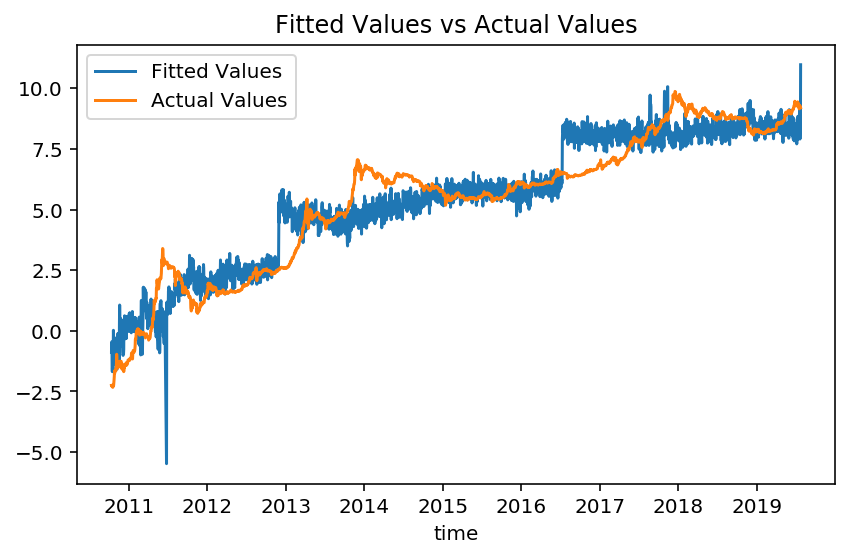

In [23]:
fig, axs = plt.subplots(1,1);

y1=results.fittedvalues
y2=bitcoindata['lnprice']
x= pd.to_datetime(bitcoindata['timestamp'])
axs.plot(x,y1, label='Fitted Values')
axs.plot(x,y2, label='Actual Values')
axs.set_title('Fitted Values vs Actual Values');
axs.set_xlabel('time');
axs.legend(loc='upper left')

fig.tight_layout();
